Analysis of Tennis Player Prize Money

By Harmony Allan-Mah, Brandon Hui, Leo Qu and Elena Zettelmeyer

>> insert


New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Seasons,Current.Elo.Rank,Best.Elo.Rank,Peak.Elo.Rating,Height,Current.Rank,Best.Rank,GOAT.Rank,Prize.Money
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,11,1826,21,2037,193,183,17,264,6091971
31,14,2211,3,2329,198,121,3,33,25889586
33,14,1791,29,2004,190,130,19,264,10821168
32,15,1993,18,2068,198,45,11,157,11912152
32,16,2004,14,2112,178,12,9,151,13470614
29,11,1892,35,1962,180,27,23,357,4850190
32,13,1860,44,1946,190,161,33,357,7114496
27,11,1845,38,1953,183,304,40,489,4660132
35,18,1879,21,2029,190,85,18,293,10581476


Age          Seasons Current.Elo.Rank    Best.Elo.Rank 
      0.18767662       0.42030470       0.77216326      -0.50019089 
 Peak.Elo.Rating           Height     Current.Rank        Best.Rank 
      0.84909376       0.02801205      -0.32429820      -0.49511756 
       GOAT.Rank      Prize.Money 
     -0.57507299       1.00000000

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


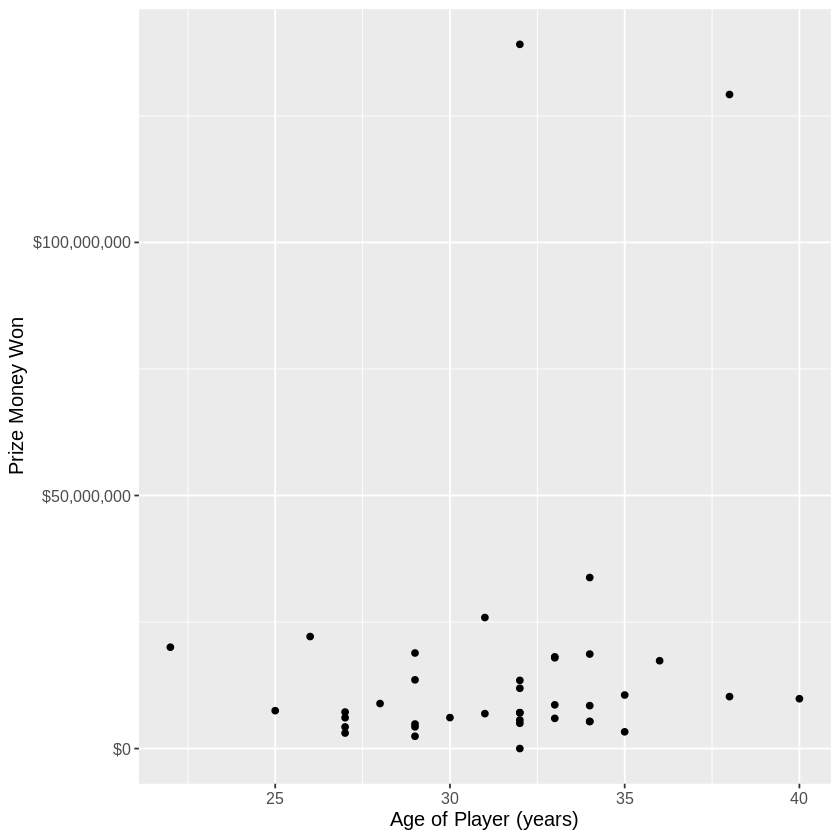

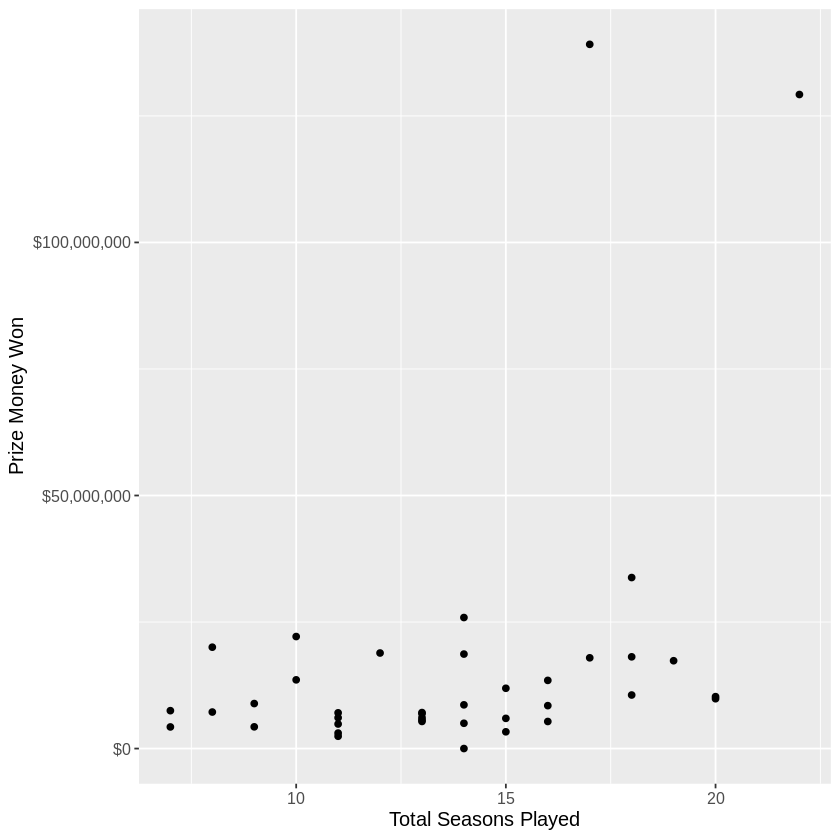

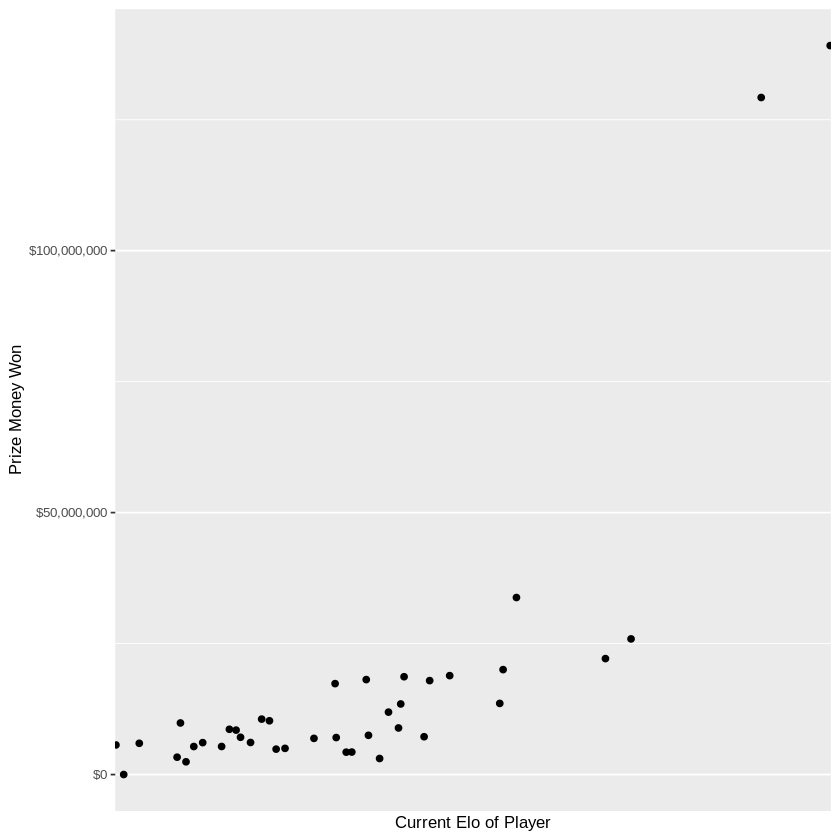

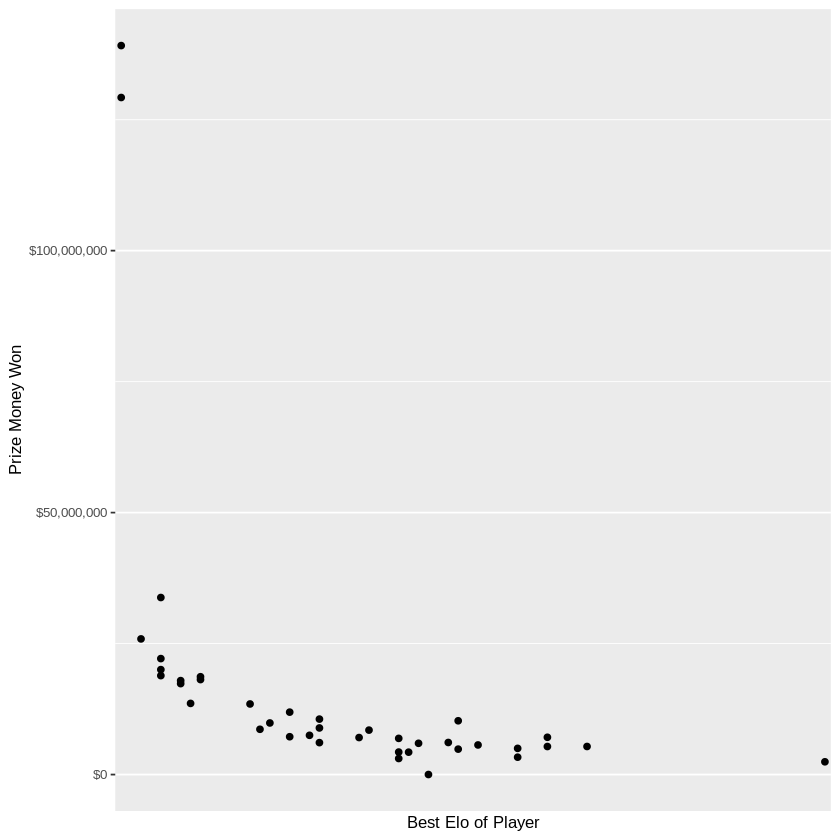

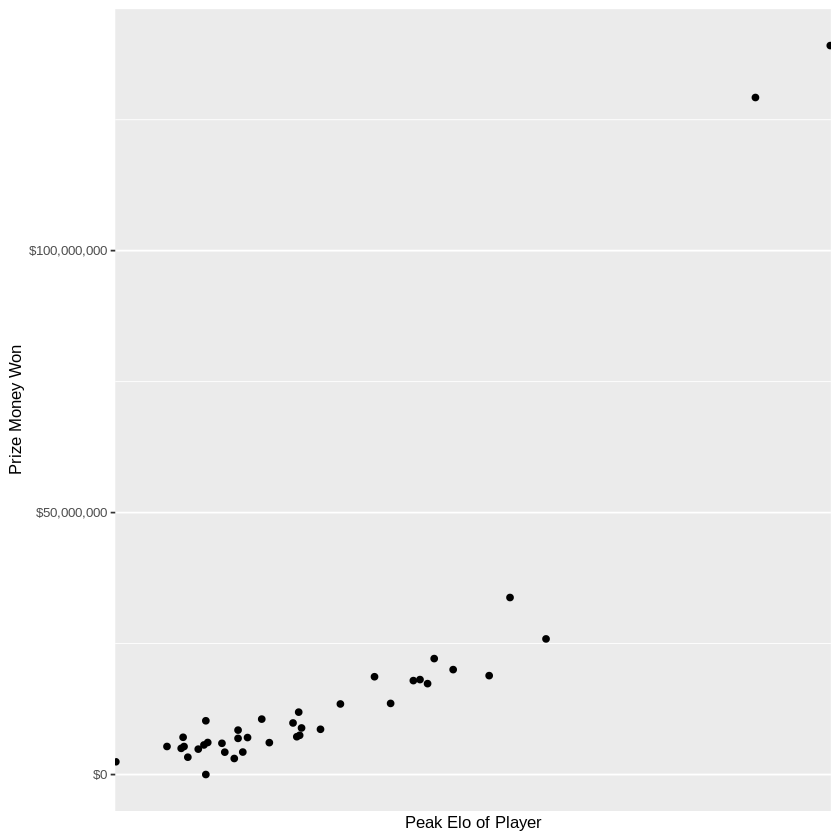

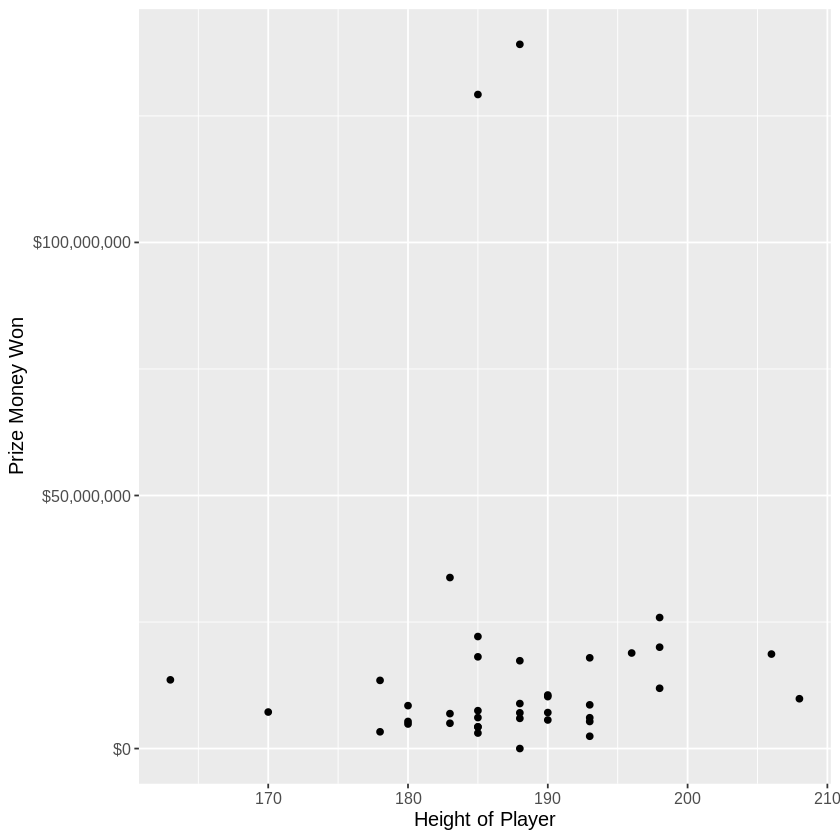

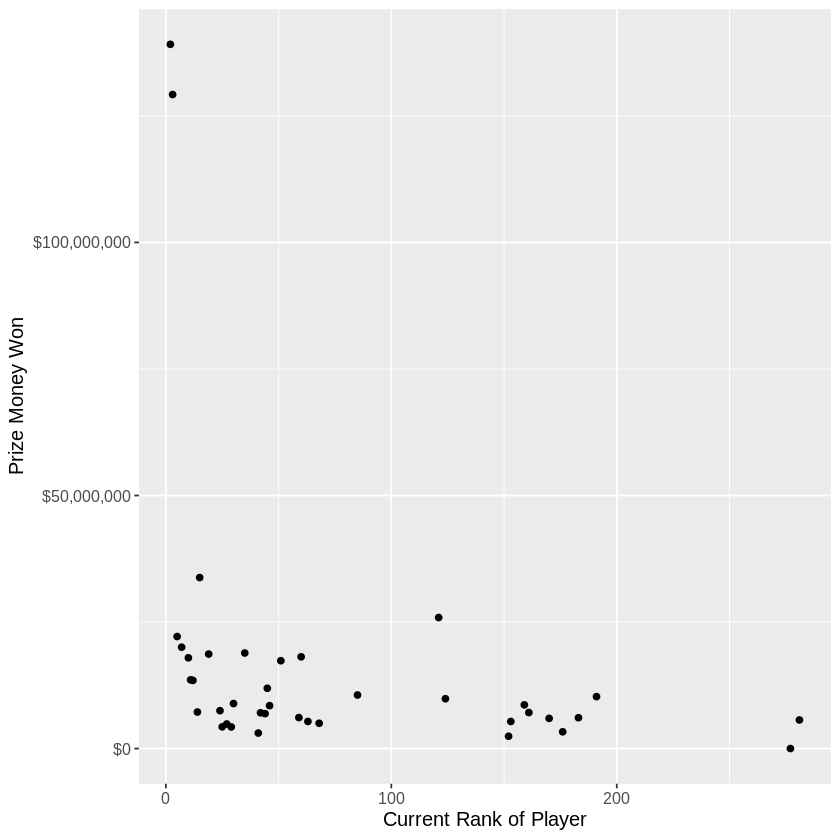

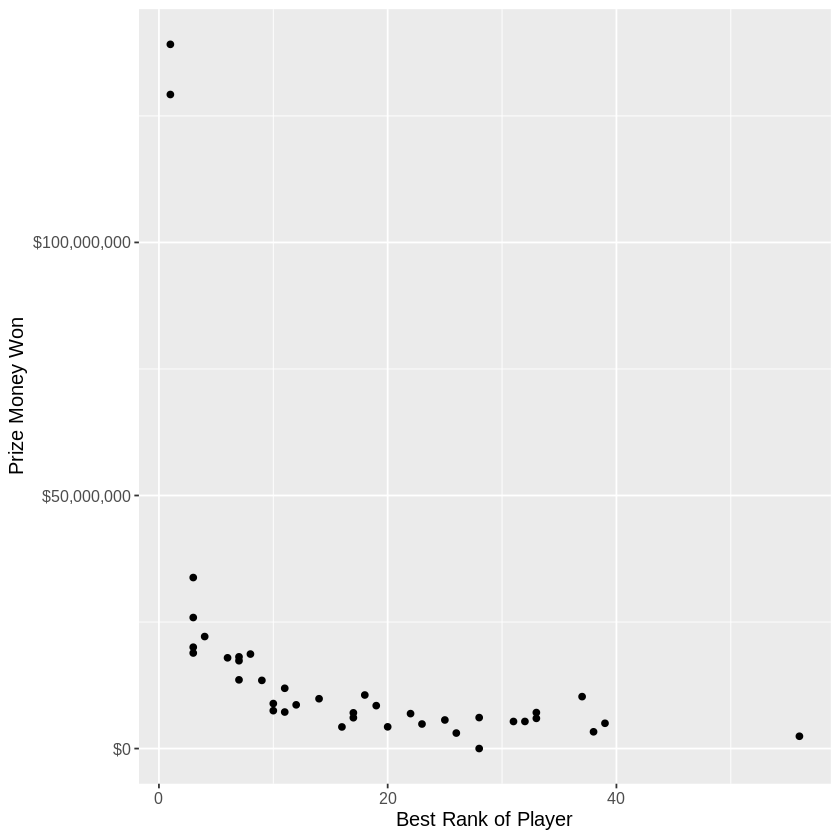

[1] 7707751

[1] 10581796

[1] 9581086

[1] 10025783

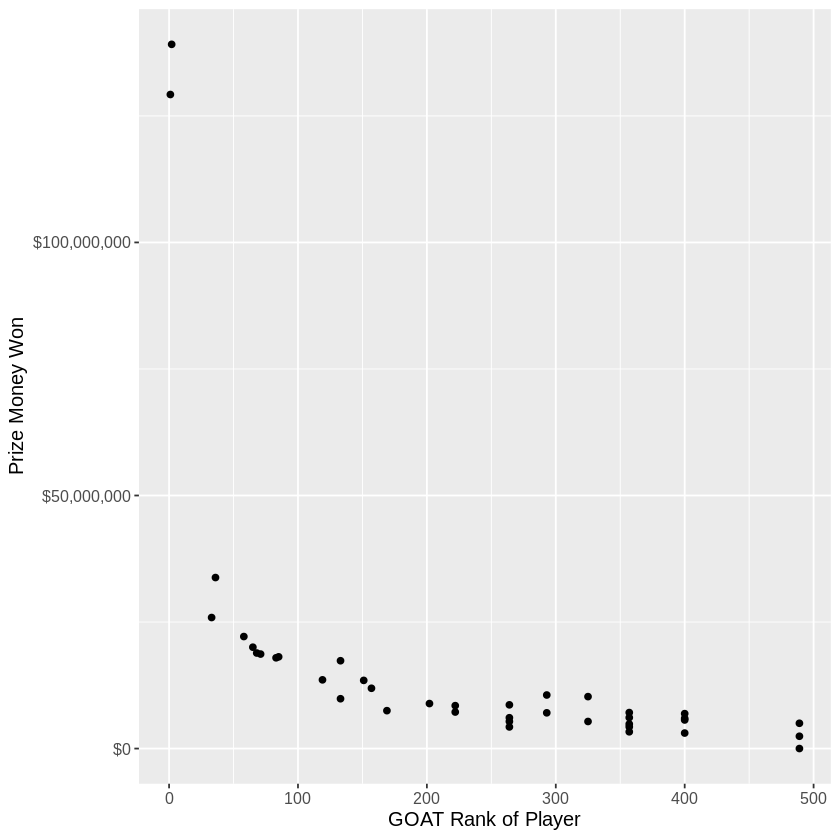

In [5]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(GGally)

player_stats <- read_csv("data")

colnames(player_stats) <- make.names(colnames(player_stats), unique = TRUE)
player_stats_tidy <- player_stats |> filter(Active == "Yes", Current.Elo.Rank != "N/A", Height != "N/A", GOAT.Rank != "N/A") |> 
                                     select(Age, Seasons, Current.Elo.Rank, Best.Elo.Rank, Peak.Elo.Rating, Height, Current.Rank, Best.Rank, GOAT.Rank, Prize.Money) |> 
                                     mutate(Age = as.numeric(substr(Age, 1,2)), 
                                            Current.Rank = as.numeric(gsub("\\(.*?\\)", "", Current.Rank)),
                                            Best.Rank = as.numeric(gsub("\\(.*?\\)", "", Best.Rank)),
                                            Height = as.numeric(gsub("cm", "", Height)),
                                            Peak.Elo.Rating = as.numeric(gsub("\\(.*?\\)", "", Peak.Elo.Rating)),
                                            GOAT.Rank = as.numeric(gsub("\\(.*?\\)", "", GOAT.Rank)),
                                            Best.Elo.Rank = as.numeric(gsub("\\(.*?\\)", "", Best.Elo.Rank)),
                                            Current.Elo.Rank = as.numeric(gsub("[\\(\\)]", "", regmatches(Current.Elo.Rank, gregexpr("\\(.*?\\)", Current.Elo.Rank)))),
                                            Prize.Money = parse_number(Prize.Money))
player_stats_tidy

player_cor <- cor(player_stats_tidy)
player_cor[ , 10]

player_stats_split <- initial_split(player_stats_tidy, prop = 0.6, strata = Prize.Money)
player_stats_train <- training(player_stats_split)
player_stats_test <- testing(player_stats_split)

player_age_plot <- ggplot(player_stats_train, aes(x = Age, y = Prize.Money)) +
  geom_point() +
  xlab("Age of Player (years)") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_seasons_plot <- ggplot(player_stats_train, aes(x = Seasons, y = Prize.Money)) +
  geom_point() +
  xlab("Total Seasons Played") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_current_elo_plot <- ggplot(player_stats_train, aes(x = Current.Elo.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Current Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_best_elo_plot <- ggplot(player_stats_train, aes(x = Best.Elo.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Best Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_peak_elo_plot <- ggplot(player_stats_train, aes(x = Peak.Elo.Rating, y = Prize.Money)) +
  geom_point() +
  xlab("Peak Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_height_plot <- ggplot(player_stats_train, aes(x = Height, y = Prize.Money)) +
  geom_point() +
  xlab("Height of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_current_rank_plot <- ggplot(player_stats_train, aes(x = Current.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Current Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_best_rank_plot <- ggplot(player_stats_train, aes(x = Best.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Best Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_goat_rank_plot <- ggplot(player_stats_train, aes(x = GOAT.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("GOAT Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_age_plot
player_seasons_plot
player_current_elo_plot
player_best_elo_plot
player_peak_elo_plot 
player_height_plot
player_current_rank_plot
player_best_rank_plot
player_goat_rank_plot

lm_spec <- linear_reg() |> set_engine("lm") |> set_mode("regression")

tennis_recipe_all <- recipe(
    Prize.Money ~ ., data = player_stats_train)

tennis_recipe_best <- recipe(
    Prize.Money ~ Seasons + Current.Elo.Rank + Peak.Elo.Rating + Current.Rank + Best.Rank + GOAT.Rank, 
    data = player_stats_train)

tennis_fit_all <- workflow() |> add_recipe(tennis_recipe_all) |>
                            add_model(lm_spec) |> 
                            fit(player_stats_train)

lm_rmse_all <- tennis_fit_all |> predict(player_stats_train) |>
                         bind_cols(player_stats_train) |>
                         metrics(truth = Prize.Money, estimate = .pred) |> 
                         filter(.metric == "rmse") |>
                         select(.estimate) |>
                         pull()

lm_rmspe_all <- tennis_fit_all |> predict(player_stats_test) |>
                          bind_cols(player_stats_test) |> 
                          metrics(truth = Prize.Money, estimate = .pred) |> 
                          filter(.metric == "rmse") |>
                          select(.estimate) |> 
                          pull()

tennis_fit_best <- workflow() |> add_recipe(tennis_recipe_best) |>
                            add_model(lm_spec) |> 
                            fit(player_stats_train)

lm_rmse_best <- tennis_fit_best |> predict(player_stats_train) |>
                         bind_cols(player_stats_train) |>
                         metrics(truth = Prize.Money, estimate = .pred) |> 
                         filter(.metric == "rmse") |>
                         select(.estimate) |>
                         pull()

lm_rmspe_best <- tennis_fit_best |> predict(player_stats_test) |>
                          bind_cols(player_stats_test) |> 
                          metrics(truth = Prize.Money, estimate = .pred) |> 
                          filter(.metric == "rmse") |>
                          select(.estimate) |> 
                          pull()

lm_rmse_all
lm_rmspe_all
lm_rmse_best
lm_rmspe_best

>> insert

>> insert